<a href="https://colab.research.google.com/github/kim-bo-saeng/Practice_N_Learning/blob/master/modu_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold

np.random.seed(3)
tf.random.set_seed(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/ThoraricSurgery.csv', delimiter=",")

X = Data_set[:,0:17]
Y = Data_set[:,17]

model = Sequential()
model.add(Dense(30, input_dim = 17, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 100, batch_size = 10)

In [ ]:
x = [2,4,6,8]
y = [81,93,91,97]

In [ ]:
mx = np.mean(x)
my = np.mean(y)
print(mx)
print(my)

5.0
90.5


In [ ]:
divisor = sum([(i - mx)**2 for i in x])
divisor

20.0

In [ ]:
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d
dividend = top(x, mx, y, my)
dividend

46.0

In [ ]:
a = dividend / divisor
b = my - (mx*a)

In [ ]:
a

2.3

In [ ]:
b

79.0

In [ ]:
fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

def mse(y , y_hat):
  return ((y - y_hat)**2).mean()

def mse_val(y, predict_result):
  return mse(np.array(y), np.array(predict_result))

predict_result = []

for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부한 시간=%.f, 실제 점수 = %.f, 예측점수 = %.f" % (x[i], y[i], predict(x[i])))

print("mse 최종값: " + str(mse_val(predict_result, y)))

공부한 시간=2, 실제 점수 = 81, 예측점수 = 82
공부한 시간=4, 실제 점수 = 93, 예측점수 = 88
공부한 시간=6, 실제 점수 = 91, 예측점수 = 94
공부한 시간=8, 실제 점수 = 97, 예측점수 = 100
mse 최종값: 11.0


In [ ]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

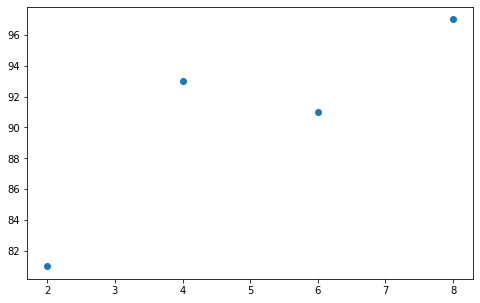

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x, y)

In [ ]:
x_data = np.array(x)
y_data = np.array(y)

In [ ]:
a = 0
b = 0
lr = 0.03
epochs = 2001

epochs = 0, 기울기 = 27.8400, 절편 = 5.4300
epochs = 100, 기울기 = 7.0739, 절편 = 50.5117
epochs = 200, 기울기 = 4.0960, 절편 = 68.2822
epochs = 300, 기울기 = 2.9757, 절편 = 74.9678
epochs = 400, 기울기 = 2.5542, 절편 = 77.4830
epochs = 500, 기울기 = 2.3956, 절편 = 78.4293
epochs = 600, 기울기 = 2.3360, 절편 = 78.7853
epochs = 700, 기울기 = 2.3135, 절편 = 78.9192
epochs = 800, 기울기 = 2.3051, 절편 = 78.9696
epochs = 900, 기울기 = 2.3019, 절편 = 78.9886
epochs = 1000, 기울기 = 2.3007, 절편 = 78.9957
epochs = 1100, 기울기 = 2.3003, 절편 = 78.9984
epochs = 1200, 기울기 = 2.3001, 절편 = 78.9994
epochs = 1300, 기울기 = 2.3000, 절편 = 78.9998
epochs = 1400, 기울기 = 2.3000, 절편 = 78.9999
epochs = 1500, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1600, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1700, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1800, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1900, 기울기 = 2.3000, 절편 = 79.0000
epochs = 2000, 기울기 = 2.3000, 절편 = 79.0000


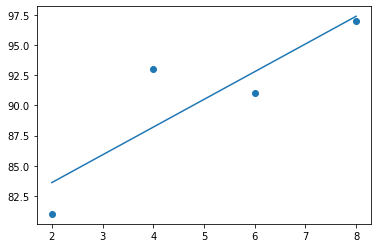

In [ ]:
for i in range(epochs):
  y_pred = a * x_data + b
  error = y_data - y_pred

  a_diff = -(2/len(x_data)) * sum(x_data * error)
  b_diff = -(2/len(x_data)) * sum(error)

  a = a - lr * a_diff
  b = b - lr * b_diff

  if i % 100 == 0:
    print("epochs = %.f, 기울기 = %.04f, 절편 = %.04f" % (i, a, b))

y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])

epochs = 0, 기울기1 = 23.2000, 기울기2 = 10.5625,절편 = 4.5250
epochs = 100, 기울기1 = 6.4348, 기울기2 = 3.9893,절편 = 43.9757
epochs = 200, 기울기1 = 3.7255, 기울기2 = 3.0541,절편 = 62.5766
epochs = 300, 기울기1 = 2.5037, 기울기2 = 2.6323,절편 = 70.9656
epochs = 400, 기울기1 = 1.9527, 기울기2 = 2.4420,절편 = 74.7491
epochs = 500, 기울기1 = 1.7042, 기울기2 = 2.3562,절편 = 76.4554
epochs = 600, 기울기1 = 1.5921, 기울기2 = 2.3175,절편 = 77.2250
epochs = 700, 기울기1 = 1.5415, 기울기2 = 2.3001,절편 = 77.5720
epochs = 800, 기울기1 = 1.5187, 기울기2 = 2.2922,절편 = 77.7286
epochs = 900, 기울기1 = 1.5084, 기울기2 = 2.2886,절편 = 77.7992
epochs = 1000, 기울기1 = 1.5038, 기울기2 = 2.2870,절편 = 77.8310
epochs = 1100, 기울기1 = 1.5017, 기울기2 = 2.2863,절편 = 77.8453
epochs = 1200, 기울기1 = 1.5008, 기울기2 = 2.2860,절편 = 77.8518
epochs = 1300, 기울기1 = 1.5003, 기울기2 = 2.2858,절편 = 77.8547
epochs = 1400, 기울기1 = 1.5002, 기울기2 = 2.2858,절편 = 77.8561
epochs = 1500, 기울기1 = 1.5001, 기울기2 = 2.2857,절편 = 77.8567
epochs = 1600, 기울기1 = 1.5000, 기울기2 = 2.2857,절편 = 77.8569
epochs = 1700, 기울기1 = 1.5000, 기울기2 = 2.285

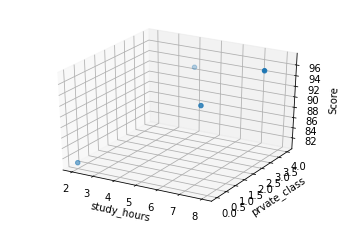

In [ ]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('prvate_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)

x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

a1 = 0
a2 = 0
b = 0
lr = 0.05
epochs = 2001

for i in range(epochs):
  y_pred = a1 * x1_data + a2 * x2_data + b
  error = y_data - y_pred

  a1_diff = -(1/len(x1_data)) * sum(x1_data * error)
  a2_diff = -(1/len(x2_data)) * sum(x2_data * error)
  b_diff = -(1/len(x1_data)) * sum(y_data - y_pred)
  a1 = a1 - lr * a1_diff
  a2 = a2 - lr * a2_diff
  b = b - lr * b_diff

  if i % 100 == 0:
    print("epochs = %.f, 기울기1 = %.04f, 기울기2 = %.04f,절편 = %.04f" % (i, a1, a2, b))

epochs=0, 기울기=-0.0500, 절편=-0.0250
epochs=0, 기울기=-0.1388, 절편=-0.0472
epochs=0, 기울기=-0.2268, 절편=-0.0619
epochs=0, 기울기=0.1201, 절편=-0.0185
epochs=0, 기울기=0.2374, 절편=-0.0068
epochs=0, 기울기=0.2705, 절편=-0.0040
epochs=0, 기울기=0.2860, 절편=-0.0029
epochs=1000, 기울기=1.4978, 절편=-9.9401
epochs=1000, 기울기=1.4940, 절편=-9.9411
epochs=1000, 기울기=1.4120, 절편=-9.9547
epochs=1000, 기울기=1.4949, 절편=-9.9444
epochs=1000, 기울기=1.4982, 절편=-9.9440
epochs=1000, 기울기=1.4984, 절편=-9.9440
epochs=1000, 기울기=1.4985, 절편=-9.9440
epochs=2000, 기울기=1.9065, 절편=-12.9489
epochs=2000, 기울기=1.9055, 절편=-12.9491
epochs=2000, 기울기=1.8515, 절편=-12.9581
epochs=2000, 기울기=1.9057, 절편=-12.9514
epochs=2000, 기울기=1.9068, 절편=-12.9513
epochs=2000, 기울기=1.9068, 절편=-12.9513
epochs=2000, 기울기=1.9068, 절편=-12.9513


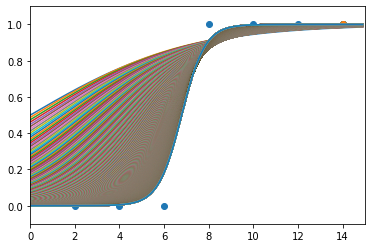

In [ ]:
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-.1,1.1)

a = 0
b = 0
lr = 0.05

def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

for i in range(2001):
  for x_data, y_data in data:
    a_diff = x_data * (sigmoid(a * x_data + b) - y_data)
    b_diff = sigmoid(a * x_data + b) - y_data
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 1000 == 0:
      print('epochs=%.f, 기울기=%.04f, 절편=%.04f' % (i,a,b))

  plt.scatter(x_data, y_data)
  plt.xlim(0,15)
  plt.ylim(-.1,1.1)
  x_range = (np.arange(0, 15, 0.1))
  plt.plot(np.arange(0,15,0.1), np.array([sigmoid(a*x + b) for x in x_range]))

In [ ]:
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

def MLP(x, w, b):
  y = np.sum(w*x) + b
  if y <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1)

def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)

def AND(x1, x2):
  return MLP(np.array([x1, x2]), w2, b3)

def XOR(x1, x2):
  return AND(NAND(x1, x2) ,OR(x1, x2))

if __name__ == '__main__':
  for x in [(0,0), (1,0), (0,1), (1,1)]:
    y = XOR(x[0], x[1])
    print('입력 값: ' + str(x) + '출력 값: ' + str(y))

입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 0


In [ ]:
df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness",
                                                                                                                              "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[['pregnant', 'class']].groupby(['pregnant']).mean().reset_index()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


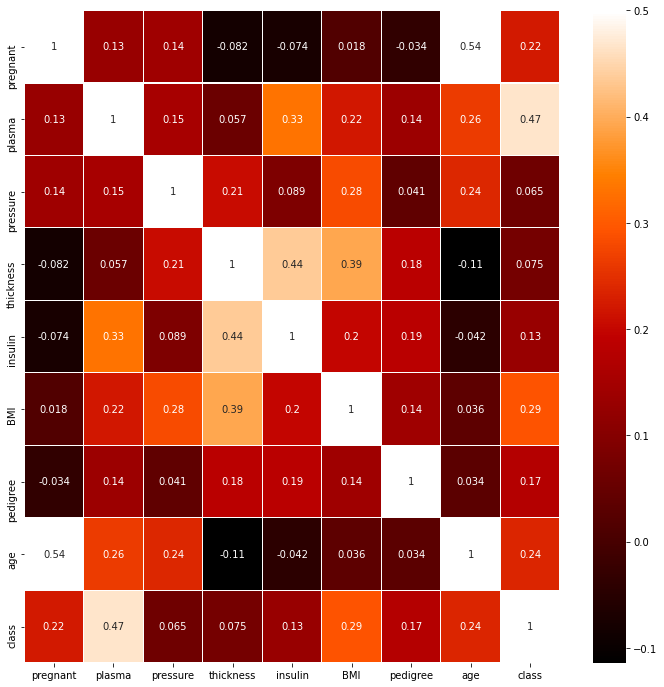

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot=True)

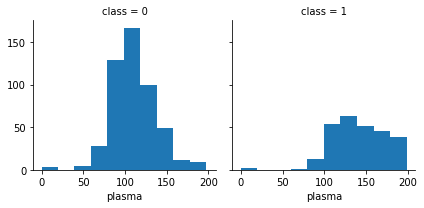

In [ ]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)

In [ ]:
seed = 3

np.random.seed(seed)
tf.random.set_seed(seed)

dataset = np.loadtxt('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 10)

print("\n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 965us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 993us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 961us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 994us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 974us/step - loss: 0.6656 - accuracy: 0.675

In [ ]:
df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/iris.csv', names = ["sepal_length", "sepal_width",
                                                                                                            "petal_lenght", "petal_width", "species"])
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_lenght,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


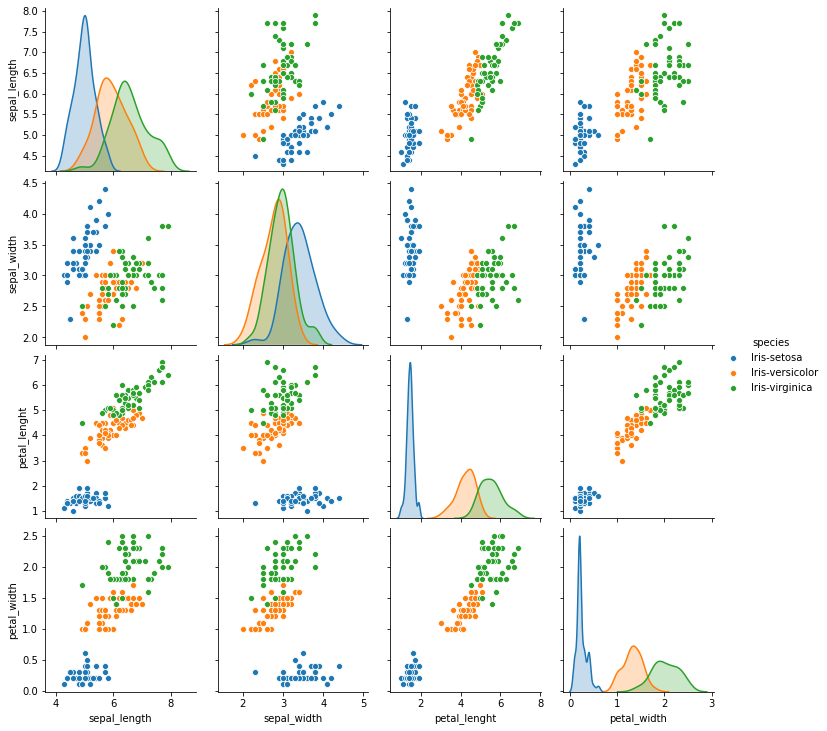

In [ ]:
sns.pairplot(df, hue = "species")

In [ ]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 + 원한인코딩
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y_encoded, epochs = 50, batch_size = 1)

print("|n Accuracy: %.4f" % (model.evaluate(X,Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 936us/step - loss: 1.4297 - accuracy: 0.3600
Epoch 2/50
150/150 [==============================] - 0s 854us/step - loss: 0.9161 - accuracy: 0.4533
Epoch 3/50
150/150 [==============================] - 0s 781us/step - loss: 0.7148 - accuracy: 0.7400
Epoch 4/50
150/150 [==============================] - 0s 860us/step - loss: 0.6155 - accuracy: 0.7800
Epoch 5/50
150/150 [==============================] - 0s 813us/step - loss: 0.5447 - accuracy: 0.7667
Epoch 6/50
150/150 [==============================] - 0s 796us/step - loss: 0.4939 - accuracy: 0.7800
Epoch 7/50
150/150 [==============================] - 0s 798us/step - loss: 0.4823 - accuracy: 0.8333
Epoch 8/50
150/150 [==============================] - 0s 757us/step - loss: 0.4620 - accuracy: 0.8067
Epoch 9/50
150/150 [==============================] - 0s 783us/step - loss: 0.4314 - accuracy: 0.8467
Epoch 10/50
150/150 [==============================] - 0s 756us/step - loss: 0.411

In [ ]:
df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
model.fit(X, Y, epochs = 200, batch_size=5)

print("|n Accuracy: %.4f" % (model.evaluate(X,Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5721
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6346
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6875
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6538
Epoch 5/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.7260
Epoch 6/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7644
Epoch 7/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7740
Epoch 8/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7981
Epoch 9/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7548
Epoch 10/200
42/42 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7788
Epoch 11/

In [5]:
from sklearn.model_selection import train_test_split

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

model = Sequential()
model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="mean_squared_error", optimizer='adam', metrics=["accuracy"])


model.fit(X_train, Y_train, epochs=130, batch_size=5)

print("|n Accuracy: %.4f" % (model.evaluate(X_test,Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.8069
Epoch 11/

In [7]:
from keras.models import load_model

model.save('my_model.h5')

In [8]:
model2 = load_model('my_model.h5')
print("accuracy : %.4f" % (model2.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.8571
accuracy : 0.8571


In [12]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle= True, random_state = seed)

accuracy = []

for train, test in skf.split(X,Y):
  model = Sequential()
  model.add(Dense(24, input_dim = 60, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss="mean_squared_error", optimizer='adam', metrics=["accuracy"])
  model.fit(X[train], Y[train], epochs=100, batch_size=5)
  k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
  accuracy.append(k_accuracy)

print("\n %.f fold accuracy" % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.6310
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.6578
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1984 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.7754
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.7861
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.7861
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1511 - accuracy: 0.8021
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.8021
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.8289
Epoch 11/

In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df_pre = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac = 1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,Y, epochs = 200, batch_size = 200)

print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
33/33 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7522
Epoch 2/200
33/33 [==============================] - 0s 989us/step - loss: 0.3072 - accuracy: 0.8952
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9235
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9272
Epoch 5/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.9280
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9312
Epoch 7/200
33/33 [==============================] - 0s 996us/step - loss: 0.2019 - accuracy: 0.9338
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9341
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1922 - accuracy: 0.9364
Epoch 10/200
33/33 [==============================] - 0s 981us/step - loss: 0.1879 - accuracy: 0.9372
Epo

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import tensorflow as tf

#seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 불러오기 및 피처(속성)/타겟(클래스) 분리
df_pre = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac = 1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.38706, saving model to ./model/01 - 0.3871.hdf5

Epoch 00002: val_loss improved from 0.38706 to 0.28561, saving model to ./model/02 - 0.2856.hdf5

Epoch 00003: val_loss improved from 0.28561 to 0.24630, saving model to ./model/03 - 0.2463.hdf5

Epoch 00004: val_loss improved from 0.24630 to 0.23385, saving model to ./model/04 - 0.2338.hdf5

Epoch 00005: val_loss improved from 0.23385 to 0.22901, saving model to ./model/05 - 0.2290.hdf5

Epoch 00006: val_loss improved from 0.22901 to 0.22135, saving model to ./model/06 - 0.2214.hdf5

Epoch 00007: val_loss improved from 0.22135 to 0.21528, saving model to ./model/07 - 0.2153.hdf5

Epoch 00008: val_loss improved from 0.21528 to 0.20855, saving model to ./model/08 - 0.2086.hdf5

Epoch 00009: val_loss improved from 0.20855 to 0.19963, saving model to ./model/09 - 0.1996.hdf5

Epoch 00010: val_loss improved from 0.19963 to 0.19792, saving model to ./model/10 - 0.1979.hdf5

Epoch 00011: val_loss i

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import tensorflow as tf

#seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 불러오기 및 피처(속성)/타겟(클래스) 분리
df_pre = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs = 3500, batch_size = 500)

# y_vloss에 테스트셋으로 실험 결과의 오차값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정학도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파란색으로 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

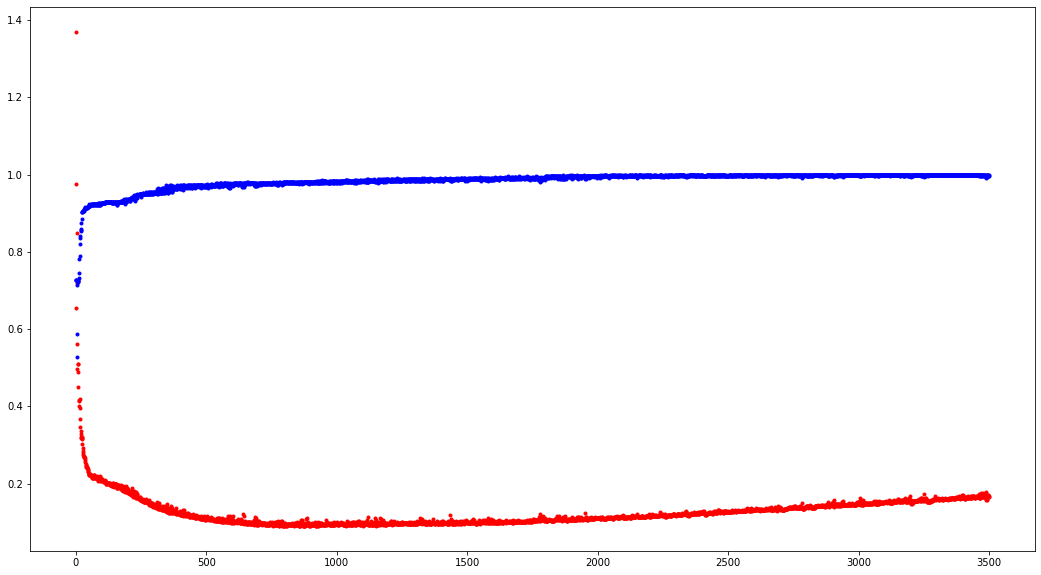

In [20]:
# y_vloss에 테스트셋으로 실험 결과의 오차값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정학도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(18,10))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

#seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 불러오기 및 피처(속성)/타겟(클래스) 분리
df_pre = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 학습자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

print('\n Accuracy: %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/2000
2/2 [==============================] - 0s 60ms/step - loss: 2.0342 - accuracy: 0.7256 - val_loss: 1.2069 - val_accuracy: 0.7744
Epoch 2/2000
2/2 [==============================] - 0s 9ms/step - loss: 1.5270 - accuracy: 0.7256 - val_loss: 0.8604 - val_accuracy: 0.7744
Epoch 3/2000
2/2 [==============================] - 0s 9ms/step - loss: 1.0603 - accuracy: 0.7256 - val_loss: 0.5777 - val_accuracy: 0.7744
Epoch 4/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.7117 - accuracy: 0.7231 - val_loss: 0.7209 - val_accuracy: 0.6256
Epoch 5/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.7558 - accuracy: 0.5756 - val_loss: 0.8500 - val_accuracy: 0.4615
Epoch 6/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.7474 - accuracy: 0.5603 - val_loss: 0.5361 - val_accuracy: 0.7333
Epoch 7/2000
2/2 [==============================] - 0s 8ms/step - loss: 0.5617 - accuracy: 0.7128 - val_loss: 0.4439 - val_accuracy: 0.7692
Epoch 8/2000
2/2 [=

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf

#seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 불러오기 및 피처(속성)/타겟(클래스) 분리
df_pre = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/wine.csv', header=None)
df = df_pre.sample(frac = 0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 학습자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.20689, saving model to ./model/01 - 1.2069.hdf5

Epoch 00002: val_loss improved from 1.20689 to 0.86037, saving model to ./model/02 - 0.8604.hdf5

Epoch 00003: val_loss improved from 0.86037 to 0.57772, saving model to ./model/03 - 0.5777.hdf5

Epoch 00004: val_loss did not improve from 0.57772

Epoch 00005: val_loss did not improve from 0.57772

Epoch 00006: val_loss improved from 0.57772 to 0.53607, saving model to ./model/06 - 0.5361.hdf5

Epoch 00007: val_loss improved from 0.53607 to 0.44392, saving model to ./model/07 - 0.4439.hdf5

Epoch 00008: val_loss improved from 0.44392 to 0.44263, saving model to ./model/08 - 0.4426.hdf5

Epoch 00009: val_loss improved from 0.44263 to 0.43578, saving model to ./model/09 - 0.4358.hdf5

Epoch 00010: val_loss improved from 0.43578 to 0.41058, saving model to ./model/10 - 0.4106.hdf5

Epoch 00011: val_loss improved from 0.41058 to 0.37877, saving model to ./model/11 - 0.3788.hdf5

Epoch 00012: val_

In [75]:
#-*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('/gdrive/My Drive/data_analysis/modu_deep_learning/deeplearning/dataset/housing.csv', delim_whitespace= True, header = None)
'''
print(df.info())
print(df.head())
'''
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

model.fit(X_train, Y_train, epochs=500, batch_size=10)

# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Epoch 1/500
36/36 [==============================] - 0s 1ms/step - loss: 8438.1172
Epoch 2/500
36/36 [==============================] - 0s 998us/step - loss: 732.8683
Epoch 3/500
36/36 [==============================] - 0s 1ms/step - loss: 512.5950
Epoch 4/500
36/36 [==============================] - 0s 2ms/step - loss: 388.6990
Epoch 5/500
36/36 [==============================] - 0s 1ms/step - loss: 256.9753
Epoch 6/500
36/36 [==============================] - 0s 1ms/step - loss: 170.7661
Epoch 7/500
36/36 [==============================] - 0s 1ms/step - loss: 135.6643
Epoch 8/500
36/36 [==============================] - 0s 992us/step - loss: 123.0021
Epoch 9/500
36/36 [==============================] - 0s 1ms/step - loss: 92.7171
Epoch 10/500
36/36 [==============================] - 0s 981us/step - loss: 80.1417
Epoch 11/500
36/36 [==============================] - 0s 1ms/step - loss: 72.3035
Epoch 12/500
36/36 [==============================] - 0s 969us/step - loss: 69.8260
Epoch 13

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	

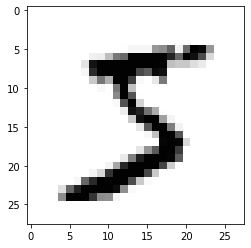

In [97]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')

# 코드로 확인
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값 확인
print("class : %d" % (Y_class_train[0]))

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])